In [1]:
#Load libraries
import pandas as pd 
import matplotlib 

In [2]:
#Import data
raw_df = pd.read_csv("survey (1).csv")

In [3]:
#Print data
raw_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
#Build a function for group by 
group_by_country = raw_df.groupby(["Country", "treatment", "work_interfere"])["Timestamp"].count().reset_index()
print(group_by_country)

                    Country treatment work_interfere  Timestamp
0                 Australia        No          Never          3
1                 Australia        No      Sometimes          4
2                 Australia       Yes          Often          5
3                 Australia       Yes         Rarely          2
4                 Australia       Yes      Sometimes          6
5                   Austria        No      Sometimes          1
6              Bahamas, The       Yes          Often          1
7                   Belgium        No          Never          1
8                   Belgium        No          Often          1
9                   Belgium        No      Sometimes          1
10                  Belgium       Yes         Rarely          1
11   Bosnia and Herzegovina        No         Rarely          1
12                   Brazil        No          Never          1
13                   Brazil        No         Rarely          1
14                   Brazil        No   

In [5]:
#Show rows specifically for United states
country_df = raw_df[raw_df["Country"] == "United States"]
print(country_df)

                Timestamp  Age  Gender        Country state self_employed  \
0     2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1     2014-08-27 11:29:37   44       M  United States    IN           NaN   
4     2014-08-27 11:30:22   31    Male  United States    TX           NaN   
5     2014-08-27 11:31:22   33    Male  United States    TN           NaN   
6     2014-08-27 11:31:50   35  Female  United States    MI           NaN   
8     2014-08-27 11:32:39   42  Female  United States    IL           NaN   
10    2014-08-27 11:32:44   31    Male  United States    OH           NaN   
12    2014-08-27 11:33:23   42  female  United States    CA           NaN   
13    2014-08-27 11:33:26   36    Male  United States    CT           NaN   
15    2014-08-27 11:34:00   29  female  United States    IL           NaN   
17    2014-08-27 11:34:37   32    Male  United States    TN           NaN   
18    2014-08-27 11:34:53   46    male  United States    MD           Yes   

In [12]:
#Build function for states of United States
states_df = country_df.groupby(["state", "treatment", "care_options"])["Timestamp"].count().reset_index()
print(states_df)

    state treatment care_options  Timestamp
0      AL        No     Not sure          1
1      AL       Yes           No          3
2      AL       Yes          Yes          4
3      AZ        No           No          1
4      AZ       Yes          Yes          6
5      CA        No           No         21
6      CA        No     Not sure         20
7      CA        No          Yes         11
8      CA       Yes           No         23
9      CA       Yes     Not sure         20
10     CA       Yes          Yes         43
11     CO        No           No          1
12     CO        No     Not sure          1
13     CO        No          Yes          3
14     CO       Yes     Not sure          1
15     CO       Yes          Yes          3
16     CT        No           No          1
17     CT        No     Not sure          1
18     CT       Yes           No          1
19     CT       Yes          Yes          1
20     DC        No           No          2
21     DC        No          Yes

In [13]:
#Sort the states dataframe by timestamp
timestamp_frequency_df = states_df.sort_values(["Timestamp"], ascending=False)
print(timestamp_frequency_df)

    state treatment care_options  Timestamp
10     CA       Yes          Yes         43
169    WA       Yes          Yes         26
8      CA       Yes           No         23
5      CA        No           No         21
9      CA       Yes     Not sure         20
6      CA        No     Not sure         20
110    NY       Yes          Yes         19
140    TN        No           No         14
151    TX       Yes          Yes         11
42     IL       Yes          Yes         11
7      CA        No          Yes         11
132    PA       Yes          Yes         11
164    WA        No           No         11
149    TX       Yes           No         10
165    WA        No     Not sure         10
145    TN       Yes          Yes         10
116    OH       Yes          Yes          9
106    NY        No     Not sure          9
141    TN        No     Not sure          9
61     MA       Yes          Yes          9
146    TX        No           No          9
105    NY        No           No

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC4D2E0470>]],
      dtype=object)

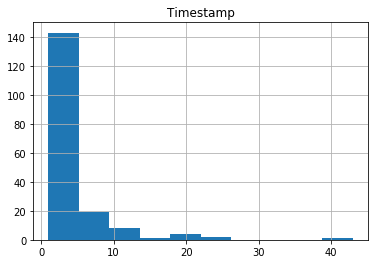

In [14]:
#Histogram by numbers of timestamp
timestamp_frequency_df.hist()

In [15]:
#Options for the mental health care provided by an employer in a different state
grp0 = states_df.groupby("state")["care_options"].sum().reset_index()
grp0.sort_values("care_options", ascending=False)
print(grp0)

   state                care_options
0     AL               Not sureNoYes
1     AZ                       NoYes
2     CA  NoNot sureYesNoNot sureYes
3     CO    NoNot sureYesNot sureYes
4     CT             NoNot sureNoYes
5     DC                    NoYesYes
6     FL     NoNot sureNoNot sureYes
7     GA          NoYesNoNot sureYes
8     IA          Not sureNoNot sure
9     ID                         Yes
10    IL  NoNot sureYesNoNot sureYes
11    IN  NoNot sureYesNoNot sureYes
12    KS               NoNot sureYes
13    KY             NoNot sureYesNo
14    LA                          No
15    MA    NoNot sureYesNot sureYes
16    MD    NoNot sureYesNot sureYes
17    ME                          No
18    MI  NoNot sureYesNoNot sureYes
19    MN  NoNot sureYesNoNot sureYes
20    MO     NoNot sureNoNot sureYes
21    MS                          No
22    NC  NoNot sureYesNoNot sureYes
23    NE                 Not sureYes
24    NH                 Not sureYes
25    NJ          NoNot sureYesNoYes
2

In [16]:
#Retrieve all columns from the top 10 care options
grp1 = grp0.iloc[:10]
print(grp1)

  state                care_options
0    AL               Not sureNoYes
1    AZ                       NoYes
2    CA  NoNot sureYesNoNot sureYes
3    CO    NoNot sureYesNot sureYes
4    CT             NoNot sureNoYes
5    DC                    NoYesYes
6    FL     NoNot sureNoNot sureYes
7    GA          NoYesNoNot sureYes
8    IA          Not sureNoNot sure
9    ID                         Yes
